# Explorative Data Analysis

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotnine import *
import plotly.graph_objects as go

In [65]:
df = pd.read_csv('data/clean/immoscout_v2.csv')
types = [col for col in df.columns if 'type' in col]
df['type'] = df[types].idxmax(axis=1)
df['type'] = df['type'].str.replace('type_', '')
df['type'] = df['type'].str.replace('unified_', '')
df.head()

,Living space,Plot area,Floor,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa,type
0,100.0,553.6,4.0,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,penthouse
1,156.0,222.0,2.0,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,terrace-house
2,93.0,1781.6,2.0,0.163362,0.095877,0.001911,47.397416,8.043150,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,penthouse
3,154.0,370.0,2.0,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,detached-house
4,142.0,584.0,0.0,0.333865,0.279276,0.145835,47.404870,8.052781,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,flat


In [81]:
df.columns

Index(['Living space', 'Plot area', 'Floor', 'ForestDensityL',
       'ForestDensityM', 'ForestDensityS', 'Latitude', 'Longitude',
       'NoisePollutionRailwayL', 'NoisePollutionRailwayM',
       'NoisePollutionRailwayS', 'NoisePollutionRoadL', 'NoisePollutionRoadM',
       'NoisePollutionRoadS', 'PopulationDensityL', 'PopulationDensityM',
       'PopulationDensityS', 'RiversAndLakesL', 'RiversAndLakesM',
       'RiversAndLakesS', 'WorkplaceDensityL', 'WorkplaceDensityM',
       'WorkplaceDensityS', 'Zip', 'distanceToTrainStation',
       'gde_area_agriculture_percentage', 'gde_area_forest_percentage',
       'gde_area_nonproductive_percentage', 'gde_area_settlement_percentage',
       'gde_average_house_hold', 'gde_empty_apartments',
       'gde_foreigners_percentage', 'gde_new_homes_per_1000',
       'gde_politics_cvp', 'gde_politics_fdp', 'gde_politics_gps',
       'gde_politics_sp', 'gde_politics_svp', 'gde_pop_per_km2',
       'gde_population', 'gde_private_apartments', 'gde_soci

In [84]:
df.describe()

,Living space,Plot area,Floor,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_unified_penthouse,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa
count,22391.000000,22391.000000,22391.000000,22391.000000,22391.000000,22391.000000,22391.000000,22391.000000,22391.000000,22391.000000,...,22391.000000,22391.000000,22391.000000,22391.000000,22391.000000,22391.000000,22391.000000,22391.000000,22391.000000,22391.00000
mean,179.250601,1698.592381,1.517351,0.188546,0.124195,0.079019,46.637277,7.578025,0.013115,0.012640,...,0.029655,0.003082,0.000045,0.038810,0.000089,0.009468,0.002858,0.004287,0.023983,0.05596
std,257.716585,4462.350348,1.223614,0.200220,0.179716,0.163733,0.495064,0.913126,0.025646,0.032819,...,0.169637,0.055428,0.006683,0.193147,0.009451,0.096845,0.053388,0.065339,0.152999,0.22985
min,6.000000,16.000000,-4.000000,0.000000,0.000000,0.000000,45.826553,5.971354,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,98.000000,557.000000,1.000000,0.023780,0.000000,0.000000,46.224047,6.930436,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,132.000000,939.200000,1.000000,0.114818,0.030448,0.000000,46.498005,7.359092,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,190.000000,1605.600000,2.000000,0.296656,0.190419,0.050985,47.056408,8.292834,0.015202,0.000386,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9681.000000,350917.000000,24.000000,0.896966,0.999453,1.000000,47.791953,10.396715,0.258665,0.391704,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [66]:
df['Floor'].unique()

array([ 4.,  2.,  0.,  1.,  3.,  6.,  5., 14., 20.,  8., -2.,  7., 15.,
       10., 11., -4., 12., -1., 21.,  9., -3., 23., 16., 13., 24., 18.])

### Geographische Lagen der Immobilien

In [67]:
fig = px.scatter_mapbox(df, lon="Longitude", lat="Latitude", zoom=7, height=500, width=850, title='Immobilienpreise in der Schweiz')

fig.update_layout(mapbox_style="open-street-map",)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

Im obigen Plot wurden alle Immobilien im Datensatz. Man sieht, dass die Punkte (Immobilien) im Westen dichter sind als im Osten, was für spätere Modelle heissen könnte dass die Vorhersagen für die Immobilien im Osten etwas ungenauer sein könnten.

### Preisverteilung Allgemein

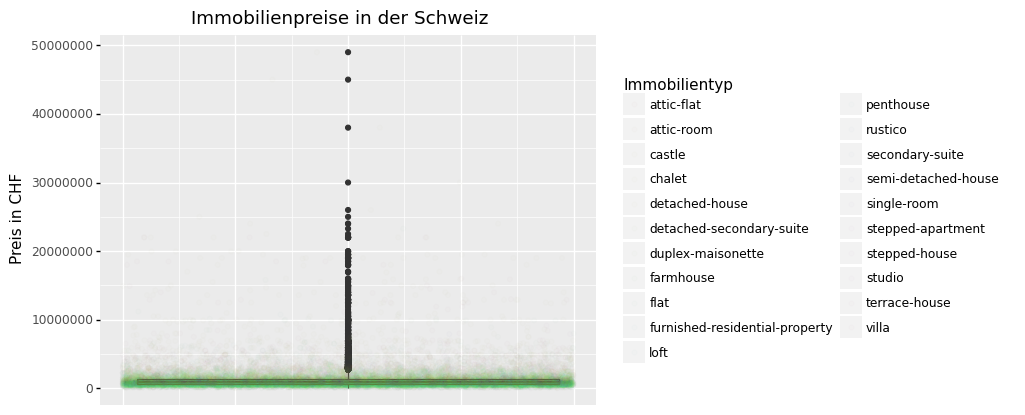

<ggplot: (175660074405)>

In [68]:
(
    ggplot(df)
    + geom_boxplot(aes(x=1, y = 'price_cleaned'))
    + geom_jitter(aes(x=1, y = 'price_cleaned', color = 'type'), alpha = 0.01)
    + labs(title = 'Immobilienpreise in der Schweiz', x = '', y = 'Preis in CHF')
    + theme(axis_text_x = element_blank(), axis_ticks_major_x = element_blank(), axis_ticks_minor_x = element_blank(), axis_title_x = element_blank())
    + scale_color_discrete(name = 'Immobilientyp')
)

Erstellt man ein Boxplot der Preise über alle Datenpunkte, erkennt man sehr schnell, dass es sehr viele Ausreisser gibt. Da diese Ausreisser könnten evtl. das Modell beeinflussen, untersuchen wir im nächsten Schritt wie wir die Ausreisser behandeln können.

Eine Möglichkeit ist es alle Datenpunkte im Trainingsdatensatz zu entfernen die einen Preis über 3'500'000 CHF sind und dann das Modell zu trainieren. Wichtig ist aber, dass wir bei dem Testdatensatz die Ausreisser nicht entfernen, da wir ja schliesslich die Vorhersagen für alle Datenpunkte machen wollen.

In [69]:
df_under_3_500_000 = df[df['price_cleaned'] < 3_500_000]

print("Es wurden", len(df) - len(df_under_3_500_000), "Aussreisser entfernt.")

Es wurden 1161 Aussreisser entfernt.


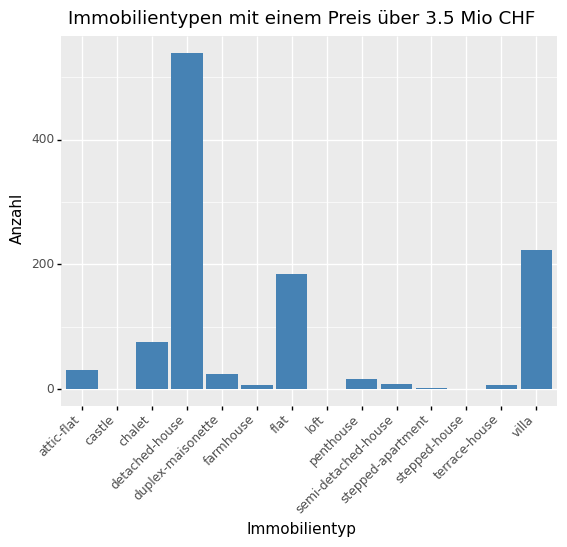

<ggplot: (175661233873)>

In [70]:
df_over_3_500_000 = df[df['price_cleaned'] > 3_500_000]

# plot distribution of types
(
    ggplot(df_over_3_500_000)
    + geom_bar(aes(x = 'type'), fill = 'steelblue')
    + labs(title = 'Immobilientypen mit einem Preis über 3.5 Mio CHF', x = 'Immobilientyp', y = 'Anzahl')
    + theme(axis_text_x = element_text(angle = 45, hjust = 1))
)

Unsere 'Ausreisser' sind über fast alle Immobilientype verteilt. <br>
Die mit Abstand am meisten aussortierten Immobilien sind von den Kategorien: Freistehende Häuser, Wohnungen und Villen. <br>
Bei den Villen ist es plausibel, dass diese sehr teuer sind. <br>
Bei den Wohnungen und Freistehenden Häusern ist es weniger plausibel, dass diese in der Regel nicht so teuer sind. <br>


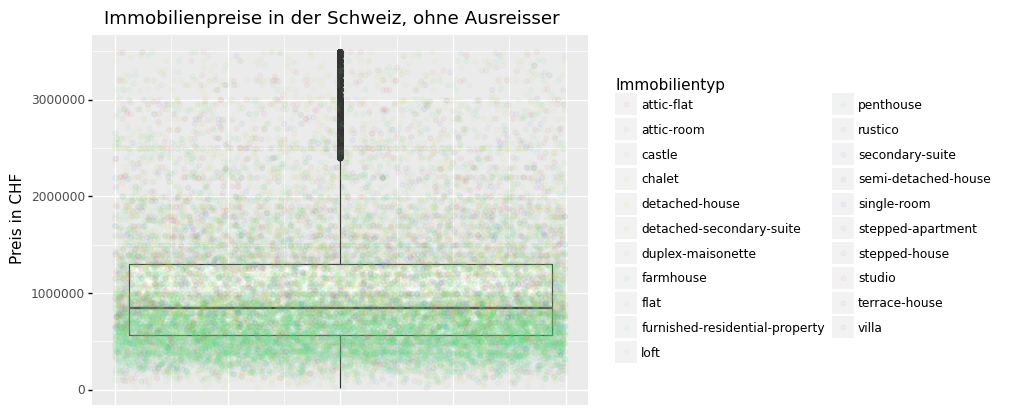

<ggplot: (175658898724)>

In [71]:
(   
    ggplot(df_under_3_500_000)
    + geom_boxplot(aes(x=1, y = 'price_cleaned'))
    + geom_jitter(aes(x=1, y = 'price_cleaned', color = 'type'), alpha = 0.05)
    + labs(title = 'Immobilienpreise in der Schweiz, ohne Ausreisser', x = '', y = 'Preis in CHF')
    + theme(axis_text_x = element_blank(), axis_ticks_major_x = element_blank(), axis_ticks_minor_x = element_blank(), axis_title_x = element_blank())
    + scale_color_discrete(name = 'Immobilientyp')
)

Vergleicht man nun beide Plots, erkennt man dass die Ausreisser entfernt wurden. Die Verteilung der Preise ist nun etwas besser, was evtl. heissen könnte dass das Modell besser abschneiden könnte.

Falls dieser Schritt angewendet wird dann aber nur auf die Trainingsdaten angewendet, damit wenn wir unser Modell auf die Testdaten anwenden, wir auch unser Modell auf die Ausreisser testen.

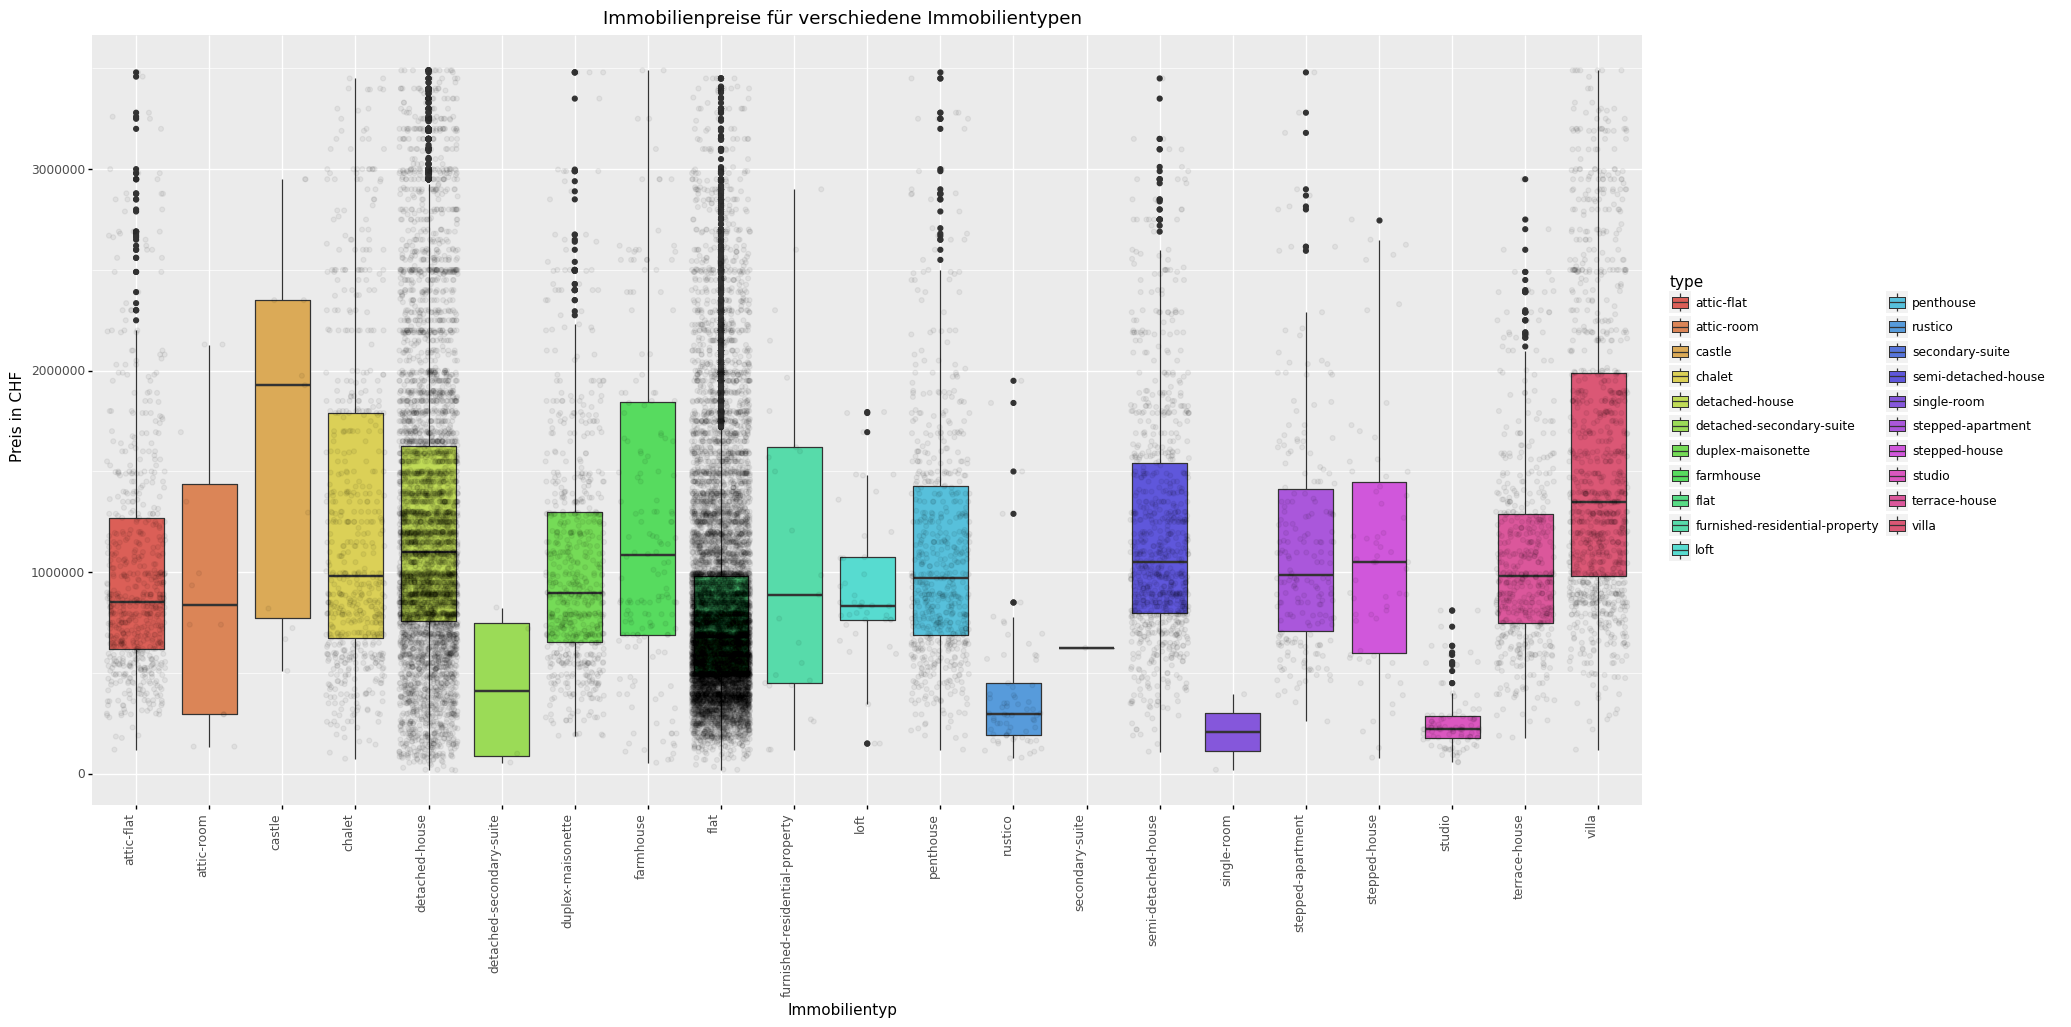

<ggplot: (175659401760)>

In [79]:
# plot the distribution of prices per type 
(
    ggplot(df_under_3_500_000)
    + geom_boxplot(aes(x='type', y = 'price_cleaned', fill = 'type'))
    + geom_jitter(aes(x='type', y = 'price_cleaned'), alpha = 0.05)
    + labs(title = 'Immobilienpreise für verschiedene Immobilientypen', x = 'Immobilientyp', y = 'Preis in CHF')
    + theme(axis_text_x = element_text(angle = 90, hjust = 1))
    + theme(figure_size = (20, 10))
)
    

c:\Python310\lib\site-packages\plotnine\utils.py:371: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



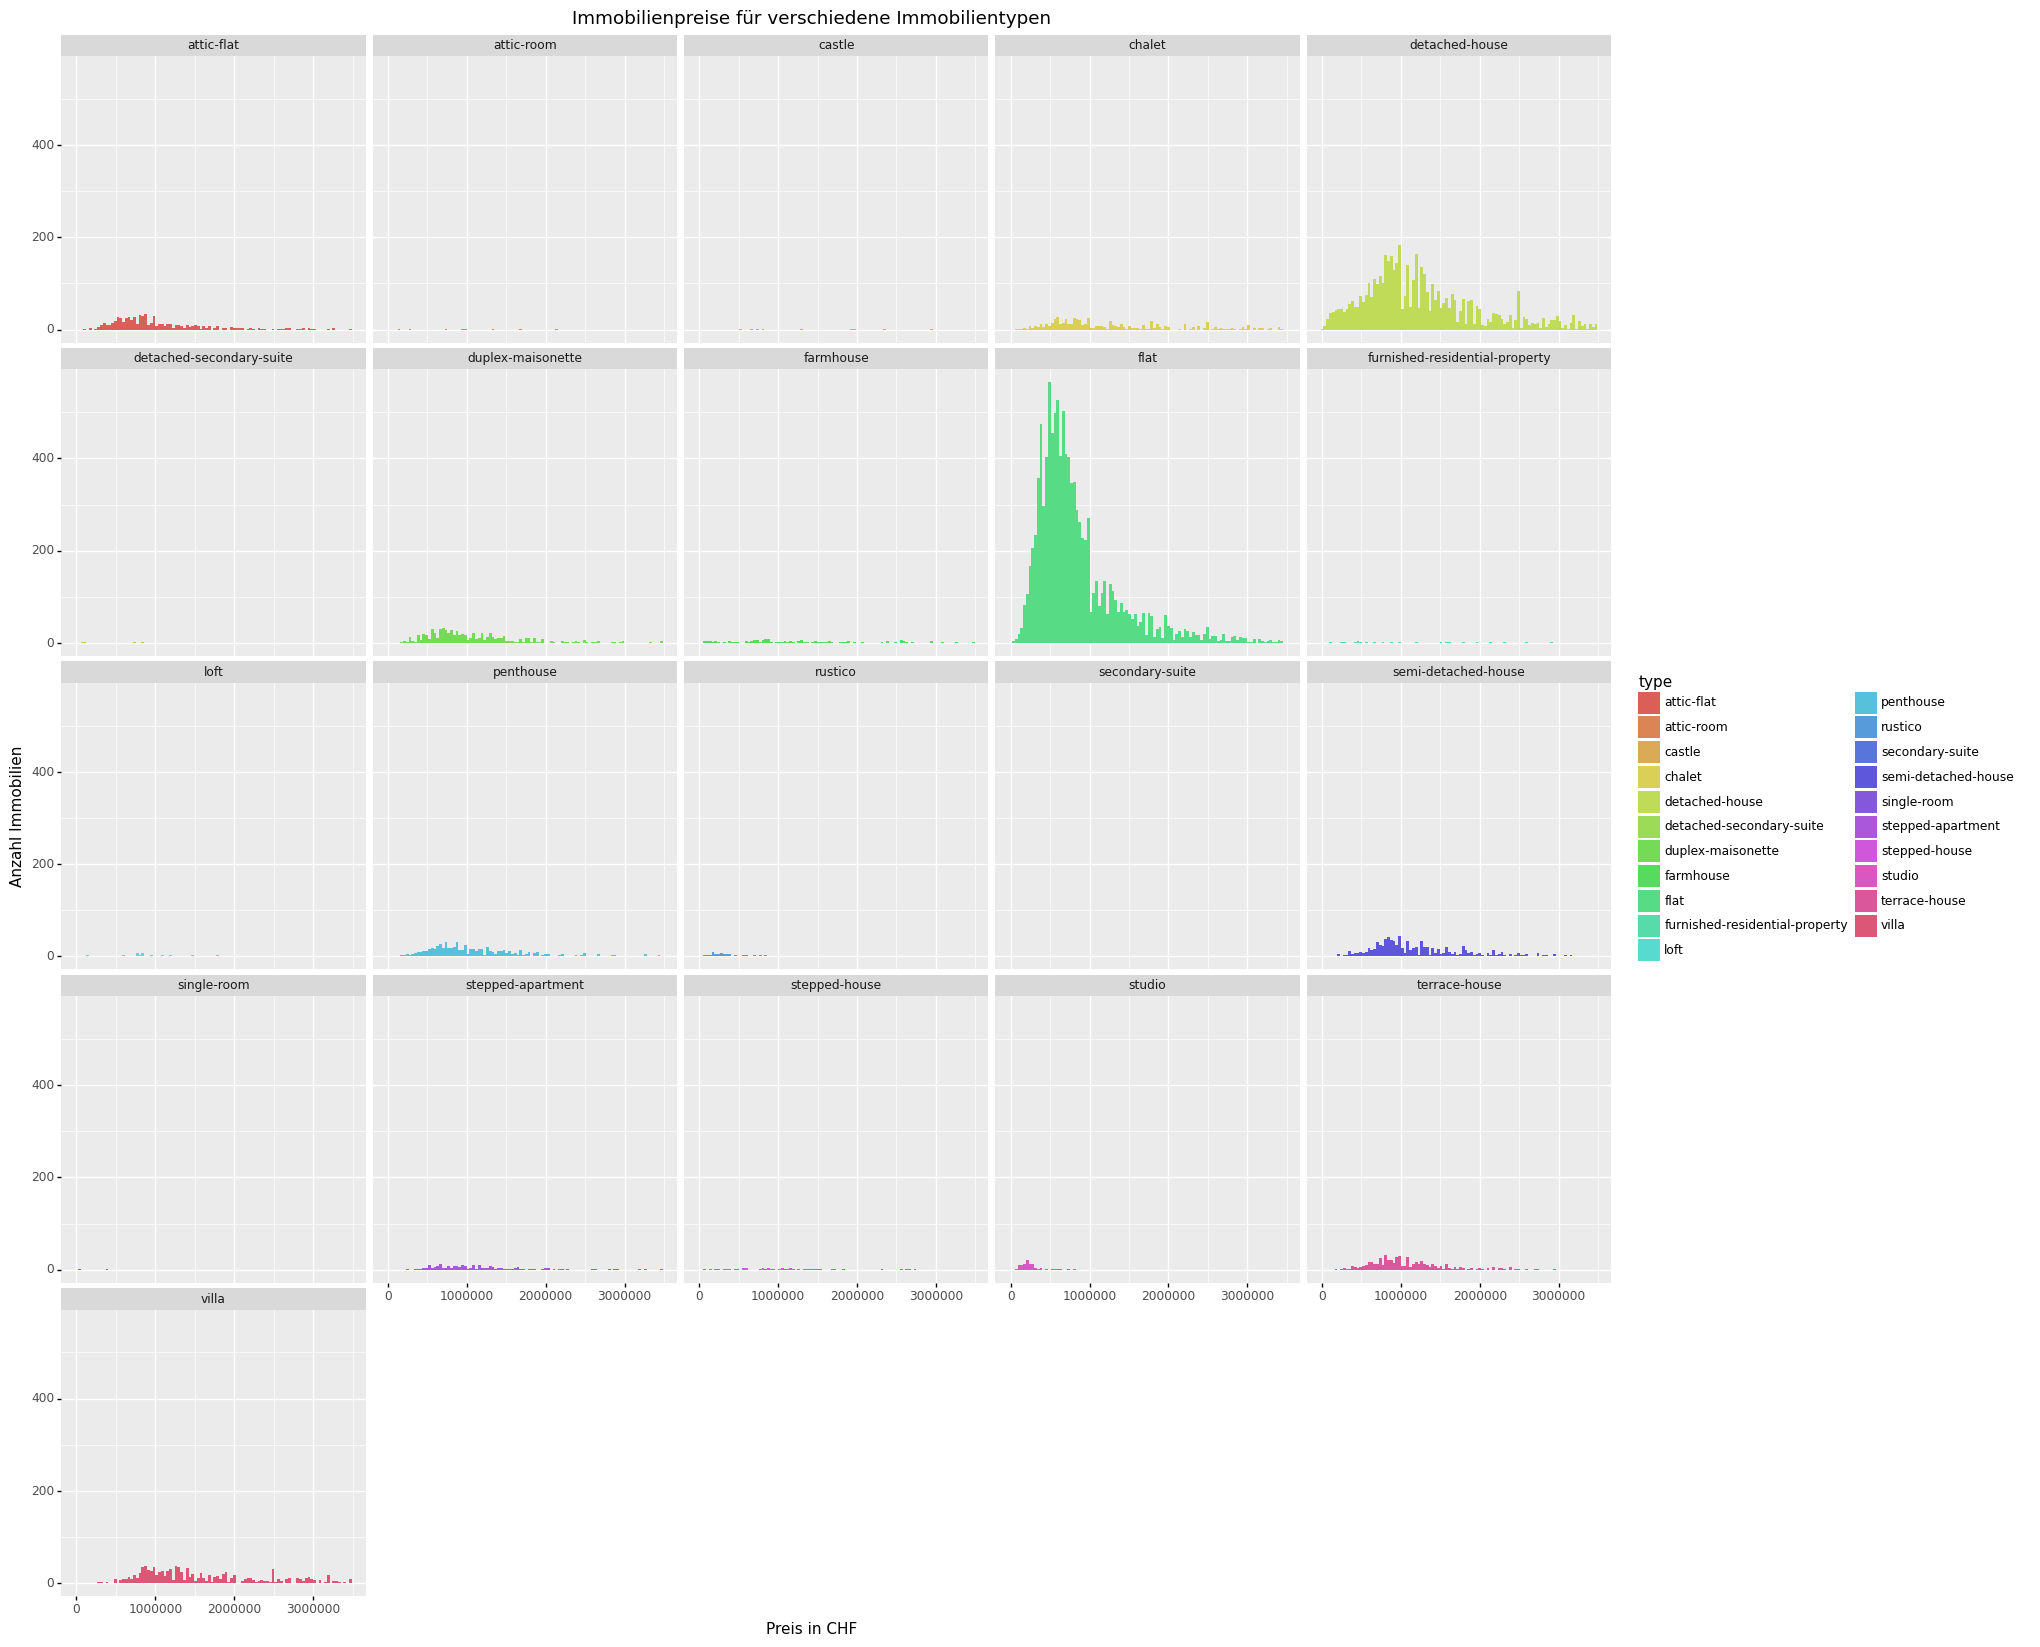

<ggplot: (175662349165)>

In [80]:
# plot the distribution in a histogram of prices per type with facet_wrap
(
    ggplot(df_under_3_500_000)
    + geom_histogram(aes(x='price_cleaned', fill = 'type'), bins = 100)
    + facet_wrap('~type')
    + labs(title = 'Immobilienpreise für verschiedene Immobilientypen', x = 'Preis in CHF', y = 'Anzahl Immobilien') 
    + theme(figure_size = (20, 20))
)

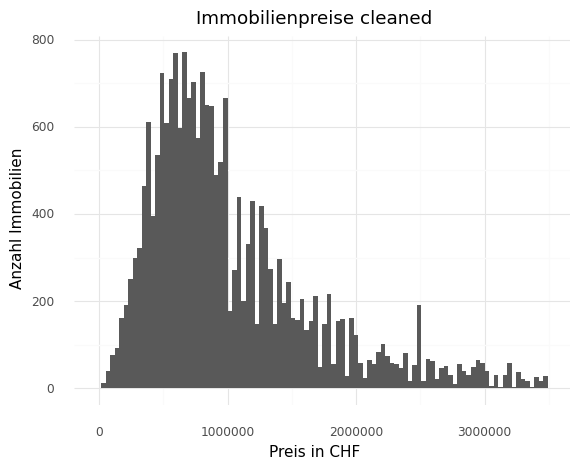

<ggplot: (175658908402)>

In [74]:
# plot distribution of prices
(
ggplot(df_under_3_500_000, aes(x='price_cleaned')) 
+ geom_histogram(bins=100) + theme_minimal() 
+ labs(title = 'Immobilienpreise cleaned', x = 'Preis in CHF', y = 'Anzahl Immobilien')
)

Die meisten Immobilien haben einen Preis zwischen 400'000 CHF und 1'000'000 CHF.

### Preisverteilung genauere Analyse

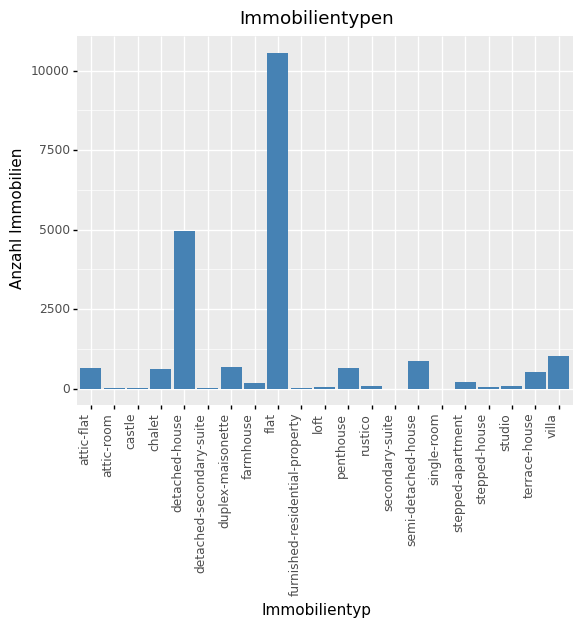

<ggplot: (175650255173)>

In [75]:
# plot distribution of types
(   
    ggplot(df_under_3_500_000)
    + geom_bar(aes(x='type'), fill = 'steelblue')
    + labs(title = 'Immobilientypen', x = 'Immobilientyp', y = 'Anzahl Immobilien')
    + theme(axis_text_x = element_text(angle = 90, hjust = 1))
)

Wir sehen, dass in unsrem Datensatz die Typen Wohnung und Freistehendes Haus am meisten vertreten sind. <br>

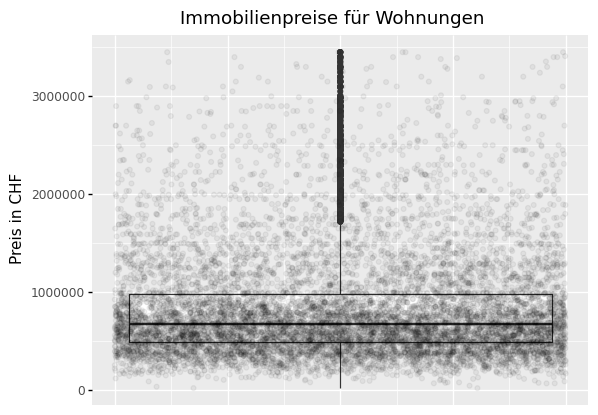

<ggplot: (175658964575)>

In [76]:
# plot the distribution of prices per type == flat
(
    ggplot(df_under_3_500_000[df_under_3_500_000['type'] == 'flat'])
    + geom_boxplot(aes(x=1, y = 'price_cleaned'))
    + geom_jitter(aes(x=1, y = 'price_cleaned'), alpha = 0.05)
    + labs(title = 'Immobilienpreise für Wohnungen', x = '', y = 'Preis in CHF')
    + theme(axis_text_x = element_blank(), axis_ticks_major_x = element_blank(), axis_ticks_minor_x = element_blank(), axis_title_x = element_blank())
)

Die Preise der Wohnungen befinden sich meistens um die 600'000 CHF und weisen eine ziemlich klare Häufung vor. <br>


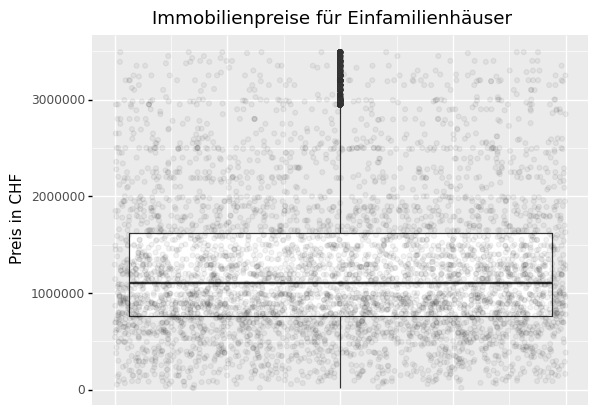

<ggplot: (175658870667)>

In [77]:
# plot the distribution of prices per type == detached_house
(
    ggplot(df_under_3_500_000[df_under_3_500_000['type'] == 'detached-house'])
    + geom_boxplot(aes(x=1, y = 'price_cleaned'))
    + geom_jitter(aes(x=1, y = 'price_cleaned'), alpha = 0.05)
    + labs(title = 'Immobilienpreise für Einfamilienhäuser', x = '', y = 'Preis in CHF')
    + theme(axis_text_x = element_blank(), axis_ticks_major_x = element_blank(), axis_ticks_minor_x = element_blank(), axis_title_x = element_blank())
)

Die Preise der Freistehenden Häuser haben keine klare Häufung. <br>
Dennoch zahlt man für ein Haus in der Regel zwischen 500'000 CHF und 1'500'000 CHF. <br>

### Allgemeine Analyse

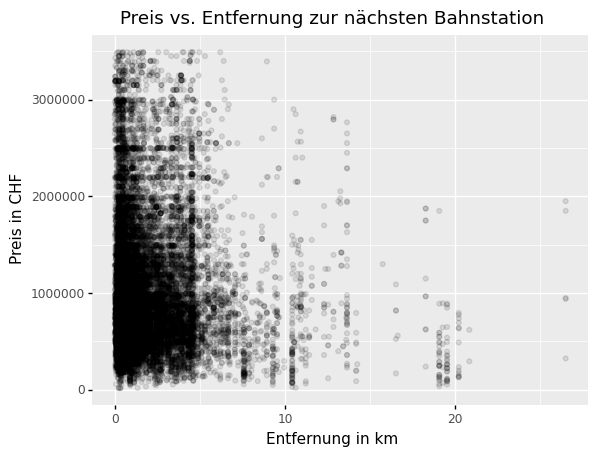

<ggplot: (175688985667)>

In [124]:
# scatterplot with price and next train station distance 
(
    ggplot(df_under_3_500_000)
    + geom_point(aes(x='distanceToTrainStation', y = 'price_cleaned'), alpha = 0.1)
    + labs(title = 'Preis vs. Entfernung zur nächsten Bahnstation', x = 'Entfernung in km', y = 'Preis in CHF')
)

Wir können keinen Zusammenhang zwischen den Preisen und der Distanz zum nächsten Bahnhof erkennen. <br>
Jedoch befinden sich die meisten Immobilien in der Nähe eines Bahnhofs.

c:\Python310\lib\site-packages\plotnine\layer.py:401: PlotnineWarning:

geom_point : Removed 1362 rows containing missing values.



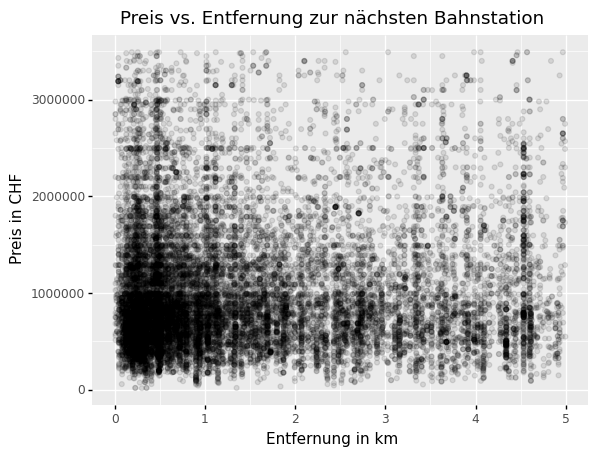

<ggplot: (175561910417)>

In [123]:
(
    ggplot(df_under_3_500_000)
    + geom_point(aes(x='distanceToTrainStation', y = 'price_cleaned'), alpha = 0.1)
    + labs(title = 'Preis vs. Entfernung zur nächsten Bahnstation', x = 'Entfernung in km', y = 'Preis in CHF')
    + xlim(0, 5)
)

Auch bei den Immobilien nahe einem Bahhof können wir kein Muster erkennen.

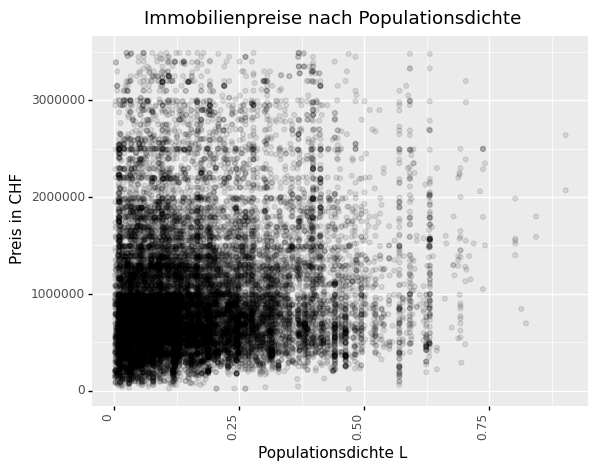

<ggplot: (175658943642)>

In [128]:
(
    ggplot(df_under_3_500_000)
    + geom_point(aes(x='PopulationDensityL', y = 'price_cleaned'), alpha = 0.1)
    + labs(title = 'Immobilienpreise nach Populationsdichte', x = 'Populationsdichte L', y = 'Preis in CHF')
    + theme(axis_text_x = element_text(angle = 90, hjust = 1))
)

Wir sehen, dass der tiefste Preis für Immobilien in Dichtbevölkerten Gebieten höher ist als in dünn besiedelten Gebieten.

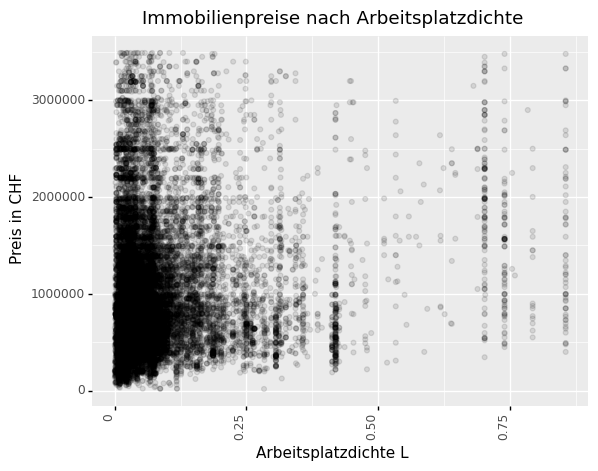

<ggplot: (175660527313)>

In [127]:
(
    ggplot(df_under_3_500_000)
    + geom_point(aes(x='WorkplaceDensityL', y = 'price_cleaned'), alpha = 0.1)
    + labs(title = 'Immobilienpreise nach Arbeitsplatzdichte', x = 'Arbeitsplatzdichte L', y = 'Preis in CHF')
    + theme(axis_text_x = element_text(angle = 90, hjust = 1))
)

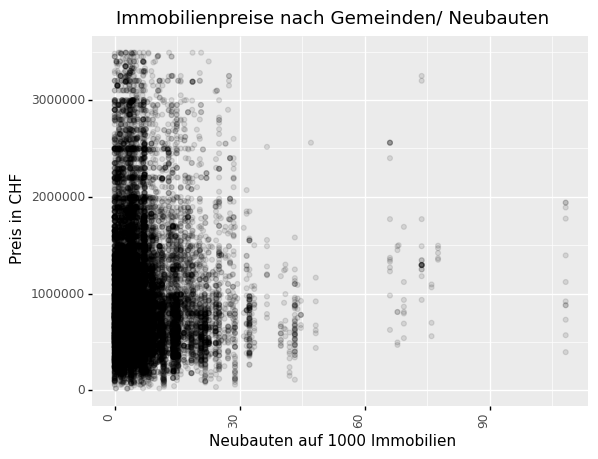

<ggplot: (175681230797)>

In [126]:
(
    ggplot(df_under_3_500_000)
    + geom_point(aes(x='gde_new_homes_per_1000', y = 'price_cleaned'), alpha = 0.1)
    + labs(title = 'Immobilienpreise nach Gemeinden/ Neubauten', x = 'Neubauten auf 1000 Immobilien', y = 'Preis in CHF')
    + theme(axis_text_x = element_text(angle = 90, hjust = 1))
)